# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(42)

In [2]:
X = 2 * np.random.rand(100,1) # random value between 0 1 with 100 rows and 1 cols
y = 4 + 3 * X + np.random.randn(100,1) # standard normal distribution with 100 rows 1 columns

Text(0, 0.5, 'y')

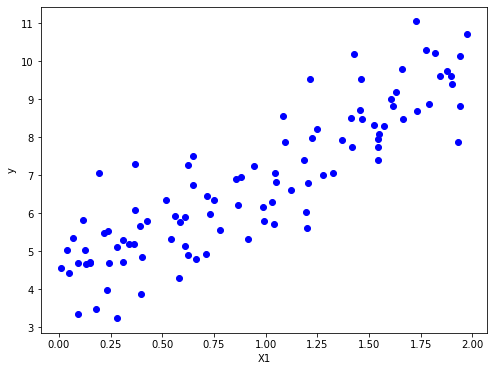

In [3]:
plt.figure(figsize = (8,6))
plt.plot(X,y,'bo')
plt.xlabel('X1')
plt.ylabel('y')

In [4]:
# compute theta that minimize the cost function
X_b = np.c_[np.ones((100,1)),X] # matrix of 100 * 2
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # normal equation
theta_best

# The Normal Equation gets very slow when the number of features grows large

array([[4.21509616],
       [2.77011339]])

In [5]:
# make prdictions : y_hat = theta ( transpose ) dot x
X_new = ([[0],[2]]) # start and end point

In [6]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

(0.0, 2.0, 0.0, 15.0)

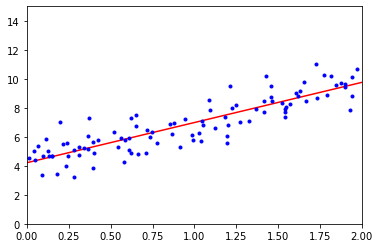

In [8]:
plt.plot(X_new, y_predict, "r-") 
plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15])

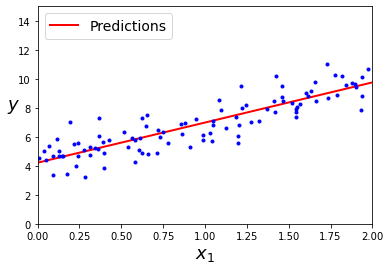

In [9]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Scikit-learn approach

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
y_pred = lin_reg.predict(X_new)

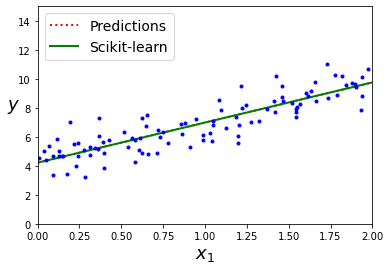

In [12]:
plt.plot(X_new, y_predict, "r:", linewidth=2, label="Predictions")
plt.plot(X_new, y_pred, "g-", linewidth=2, label="Scikit-learn")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Statsmodel approach

In [13]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)

# X_sm == X_b

In [14]:
results = sm.OLS(y, X_sm).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.66e-33
Time:                        14:26:41   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2151      0.170     24.753      0.0

In [15]:
y_pred_sm = results.predict(sm.add_constant(X_new))

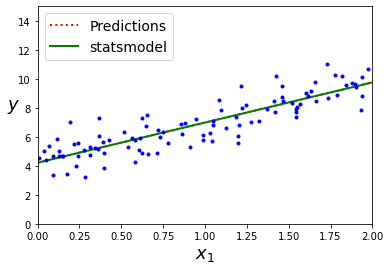

In [16]:
plt.plot(X_new, y_predict, "r:", linewidth=2, label="Predictions")
plt.plot(X_new, y_pred_sm, "g-", linewidth=2, label="statsmodel")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent 

In [17]:
# optimization algorithm
# general idea is to tweak parameters iteratively to minimize cost function

## Batch Gradient Descent

In [18]:
# compute the gradient of the cost func‐ tion with regards to each model parameter θj.
# how much the cost function will change if you change θj  ( partial deriavative )

# batch gradient descent : calculations over the full training set X, at each Gradient Descent step

In [19]:
# 1. gradient vector ( contains all the partial deriavatives of the cost function)

# 2. formula of gradient descent step
# theta ( next step ) = theta - n (learning rate ) * gradient descent vector

1. $ \frac{2}{m} X^T \cdot(X\cdot\theta -y)$
2. $ θ ^{next step} = θ − η ∇_θMSE(θ)$

In [20]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [21]:
theta # ( same as normal equaltions theta)

array([[4.21509616],
       [2.77011339]])

In [22]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b) # number of features
    plt.plot(X, y, "b.") # plot the original data points
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta) # predictions
            style = "b-" if iteration > 0 else "r--" # red dotted line will be the first line
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

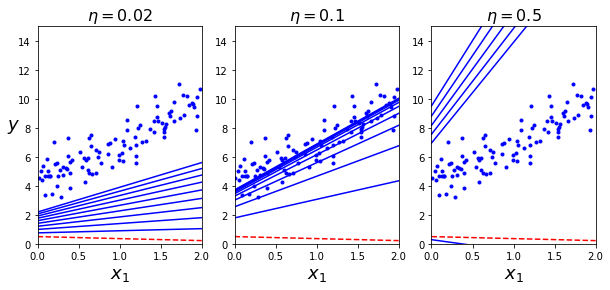

In [23]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131);
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); 
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); 
plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

In [24]:
# Stochastic Gradient Descent just picks a random instance in the training set 
# at every step and computes the gradients based only on that single instance. 

In [25]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

(0.0, 2.0, 0.0, 15.0)

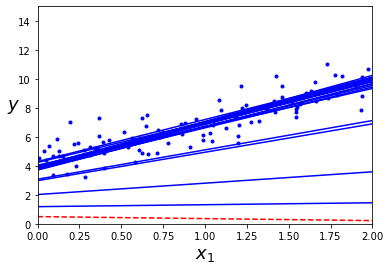

In [26]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # uses one random instance only
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15]) 

In [27]:
theta

array([[4.21076011],
       [2.74856079]])

In [28]:
# using sckit learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch Gradient Descent

In [29]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size): # train on random instances of fixed size ( 20)
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [31]:
# all theta used
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

(2.5, 4.5, 2.3, 3.9)

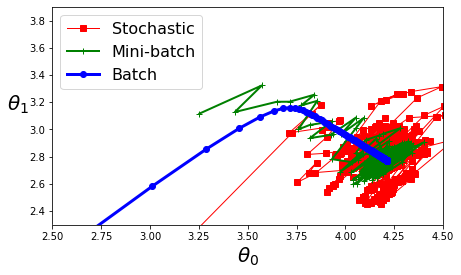

In [32]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

# Polynomial regression

In [33]:
# add powers of each feature as new features
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'y')

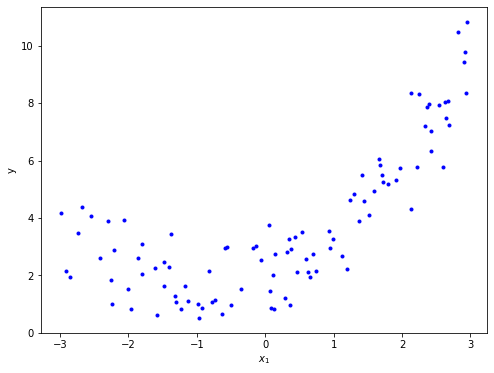

In [34]:
plt.figure(figsize= (8,6))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('y')

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [36]:
X_poly[0] # contains the original feature of X plus the square of it

array([2.38942838, 5.709368  ])

In [37]:
X[0]

array([2.38942838])

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [39]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

(-3.0, 3.0, 0.0, 10.0)

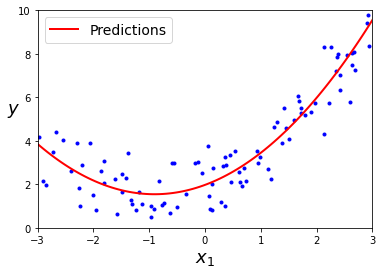

In [40]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

(-3.0, 3.0, 0.0, 10.0)

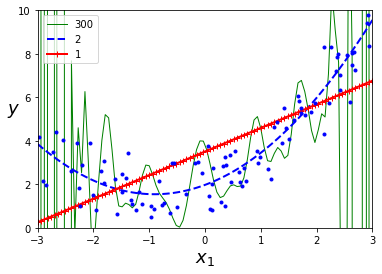

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [42]:
## Learning curves

(0.0, 80.0, 0.0, 3.0)

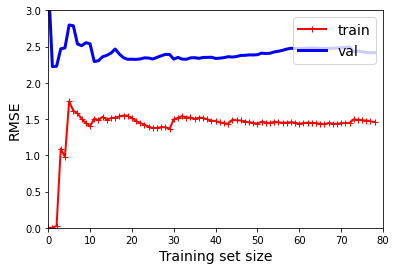

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)    
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])   

(0.0, 80.0, 0.0, 3.0)

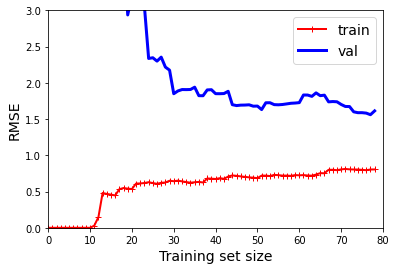

In [44]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])   

# Regularized linear models

In [45]:

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


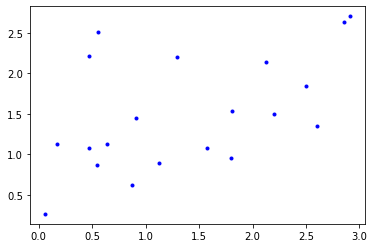

In [46]:
plt.plot(X,y,'b.')

## Ridge 

cost function = $MSE(\theta)$ + $\alpha \frac{1}{2} \sum^n_{i=1} \theta^2_i$

In [47]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

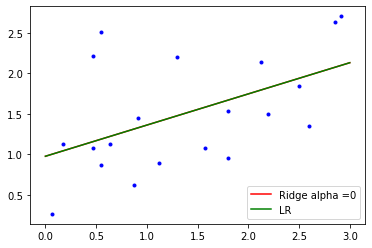

In [60]:
# comparing linear regression and Ridge with alpha = 1 ( linear regression like)
plt.plot(X,y,'b.')

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0, solver="cholesky", random_state=42)
lr = LinearRegression()
lr.fit(X,y)
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X_new)

plt.plot(X_new, y_pred,'r',label = 'Ridge alpha =0')
plt.plot(X_new,lr.predict(X_new),'g', label = 'LR' )
plt.legend()

# Ridge's alpha = 0 is same as linear regression

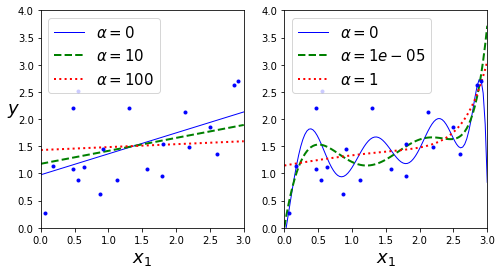

In [61]:
# comparing ridge regression's alpha on linear and polynomial regression
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

In [62]:
# SGD with l2 == simple ridge regression
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

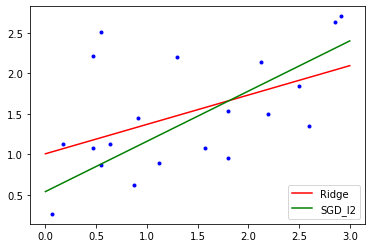

In [64]:
# comparing ridge regression and sgd l2 penalty
plt.plot(X,y,'b.')
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
y_pred = ridge_reg.predict(X_new)
plt.plot(X_new, y_pred,'r',label = 'Ridge')
plt.plot(X_new,sgd_reg.predict(X_new),'g', label = 'SGD_l2' )
plt.legend()

## Lasso regression

cost function = $MSE(\theta)$ + $\alpha \sum^n_{i=1} |\theta_i|$

/Users/samuelwong/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


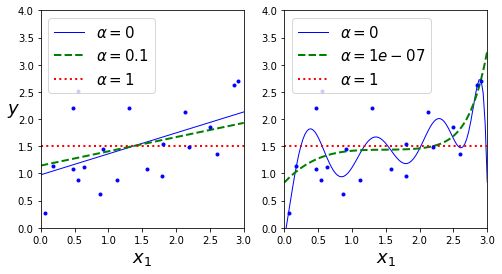

In [66]:
# uses the l1 norm of the weight vector instead of half the square of the l2 norm
# comparing Lasso regression's alpha on linear and polynomial regression

from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

In [67]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([1.53788174])

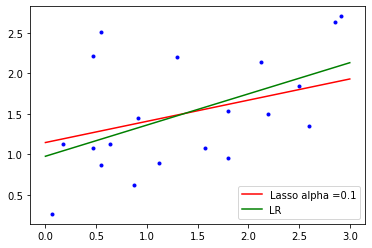

In [70]:
# comparing linear regression and Lasso with alpha = 0.1 
plt.plot(X,y,'b.')

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lr = LinearRegression()
lr.fit(X,y)
y_pred = lasso_reg.predict(X_new)

plt.plot(X_new, y_pred,'r',label = 'Lasso alpha =0.1')
plt.plot(X_new,lr.predict(X_new),'g', label = 'LR' )
plt.legend()

## Elastic net

cost function = $MSE(\theta) + r\alpha \sum^n_{i=1} |\theta_i| + \frac{1-r}{2}\alpha \sum^n_{i=1} \theta^2_i$

In [73]:
# middle groud between ridge and lasso
# r = 0 same as ridge while 1 same as lasso


from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # l1_ratio == r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

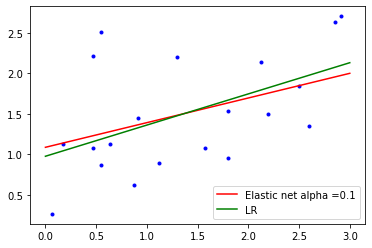

In [74]:
# comparing linear regression and elastic net with alpha = 0.1 
plt.plot(X,y,'b.')

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42) # l1_ratio == r
elastic_net.fit(X, y)
lr = LinearRegression()
lr.fit(X,y)
y_pred = elastic_net.predict(X_new)

plt.plot(X_new, y_pred,'r',label = 'Elastic net alpha =0.1')
plt.plot(X_new,lr.predict(X_new),'g', label = 'LR' )
plt.legend()

## Early stopping

In [75]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [76]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Text(0, 0.5, 'RMSE')

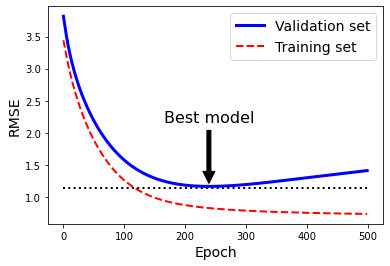

In [77]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)